# Ejercicio 1 (5 puntos)

Programar el método de Newton con tamaño de paso fijo $\alpha=1$.

La función recibe como parámetros la función que calcula el gradiente $g(x)$ de la
función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$, 
la  función que calcula la Hessiana $H(x)$ de $f$, 
un punto inicial $x_0$, un número  máximo de iteraciones $N$, 
y la  tolerancia $\tau>0$. Fijar $k=0$ y repetir los siguientes pasos:

1. Calcular el gradiente $g_k$ en el punto $x_k$, $g_k = g(x_k)$.
2. Si $\|g_k\| < \tau$,  hacer  $res=1$ y terminar. 
3. Si no se cumple el criterio, calcular la Hessiana $H_k = H(x_k)$.
4. Intentar calcular la factorización de Cholesky de $H_k$.
5. Si la factorización no se puede realizar, imprimir el mensaje de error,
   hacer $res=0$ y terminar el ciclo.
6. Si se obtuvo la factorización, resolver el sistema de ecuaciones
   $H_k p_k = -g_k$ (esto da la dirección de descenso como $p_k$).
7. Calcular el siguiente punto de la secuencia como
   $$x_{k+1} = x_k + p_k $$
8. Si $k+1\geq N$, hacer $res=0$ y terminar.
9. Si no, hacer $k = k+1$ y volver el paso 1.
10. Devolver el punto $x_k$, $g_k$, $k$ y $res$.

---

**Nota:** Para calcular la factorización de Cholesky y resolver el sistema de ecuaciones
puede usar las funciones `scipy.linalg.cho_factor` y `scipy.linalg.cho_solve`.
Si la matriz no es definida positiva, la función `cho_factor` lanza la excepción
`scipy.linalg.LinAlgError`. Puede usar esto para terminar el ciclo.

---

1. Programe la función que implementa el algoritmo del método de Newton,
   almacenando en una lista los puntos $x_0, x_1, ..., x_k$ que genera
   el algoritmo. Haga que la función devuelva esta lista.
2. Use la función de Rosenbrock, su gradiente y Hessiana para probar el algoritmo.

* Use $N=1000$, la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$ es el
  épsilon de la máquina, y el  punto inicial $x_0= (-1.2, 1)$.
* Si el algoritmo converge, imprima un mensaje que indique esto y 
  genere una gráfica que muestre las curvas de nivel de la función $f$ y 
  la trayectoria de los puntos $x_0, x_1, ..., x_k$.
  Para generar esta gráfica use una discretización de los intervalos 
  $[-1.5, 1.5]$ en la dirección $X$  y $[-1, 2]$ en la dirección $Y$.
* Imprima el punto final $x_k$, $f(x_k)$,
  la magnitud del gradiente $g_k$ y el número de iteraciones $k$ realizadas.
* Repita la prueba partiendo del punto inicial $x_0= (-12, 10)$.

## Solución:

Importaremos el módulo `lib_t6`, donde se encuentran implementadas las función de Rosenbrock, su gradiente y hessiana. Además el método de Newton con paso fijo ($\alpha=1$) está desarrollado en la función `newton_fix_step`.

A continuación probaremos el método de Newton con paso fijo para la función de Rosenbrock con un número máximo de iteraciones $N=1000$ y una tolerancia para la norma del gradiente en cada iteración de $\tau=\sqrt{\epsilon_m}$. 

Como lo hemos hecho en tareas anteriores, primero probaremos el método con la condición inicial $x_0=(-1.2,1)$ luego con la condición inicial $(-12,10)$, teniendo en mente que el óptimo de la función de Rosenbrock se encuentra en $\mathbf{x}_{\ast}=(1,1)$ con un valor mínimo para la función de $f_R(\mathbf{x}_{\ast})=0$.

### Condición inicial $x_0=(-1.2,1)$

En primer lugar, mostramos el desempeño del método de Newton con paso fijo con la condición inicial $x_0=(-1.2,1)$.

El método de Newton con paso fijo CONVERGE
El punto final es: 
xk =  [ 1.0000  1.0000]
fk =  3.4326461875363225e-20
||gk|| =  8.285705791275366e-09
k =  6


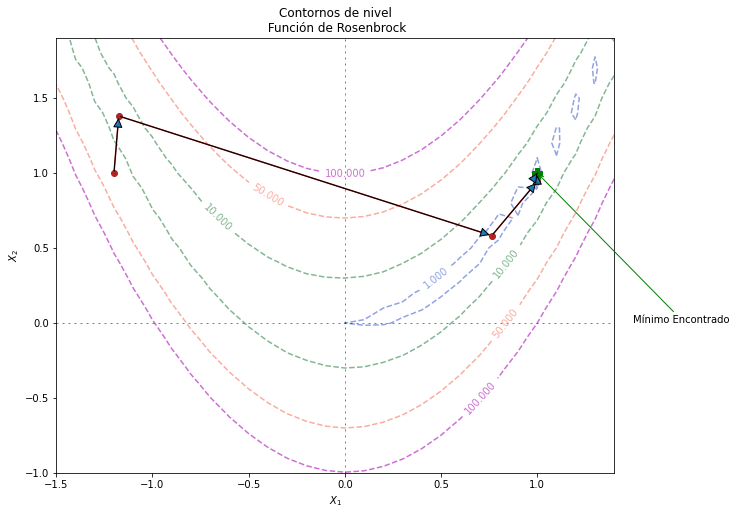

In [10]:
import importlib
import lib_t6
importlib.reload(lib_t6)
from lib_t6 import *

# Iteraciones máximas y tolerancia
N=1000
tol=np.finfo(float).eps**(1/2)

# Primer condición inicial
x0=np.array([-1.2,1.0]).reshape(-1,1)
proof_newton_fix_step_Rosenbrock(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol,f_Rosenbrock_graph)

La convergencia desde el punto inicial $x_0=(-1.2,1)$ se obtuvo en 6 iteraciones. 

Es preciso mencionar que no se dibujó la trayectoria completa, dado que se da la convergencia solo se dibujo la trayectoria de los puntos $\mathbf{x}$ tales ques 
$$\lVert \mathbf{x}-\mathbf{x}_\ast \rVert \leq \lVert (-1.5,-1)-\mathbf{x}_\ast \rVert,$$

con el fin de solo capturar los contornos de nivel comprendidos entre $[-1.5,1.5]\times [-1.0,2.0]$, que son los intervalos discretizados solicitados.

A continuación imprimimos la trayectoria completa del método junto con su evaluación en la función de Rosenbrock y la norma del gradiente en esos puntos.

In [12]:
# Trayectoria explícita
dic_results_fix_step_cod_1,trajectory_fix_step_cod_1=newton_fix_step(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol)
np.set_printoptions(precision=4,formatter={'float': '{: 0.4f}'.format})
print(' k  |      xk        |      fk     |    ||gk||    ')
k=0
for xk in trajectory_fix_step_cod_1:
    print(f' {k}  {np.squeeze(xk)}    {np.format_float_scientific(f_Rosenbrock(xk),unique=False,precision=4)}    {np.format_float_scientific(np.linalg.norm(grad_Rosenbrock(xk)),unique=False,precision=4)}')
    k+=1

 k  |      xk        |      fk     |    ||gk||    
 0  [-1.2000  1.0000]    2.4200e+01    2.3287e+02
 1  [-1.1753  1.3807]    4.7319e+00    4.6394e+00
 2  [ 0.7631 -3.1750]    1.4118e+03    1.3708e+03
 3  [ 0.7634  0.5828]    5.5966e-02    4.7311e-01
 4  [ 1.0000  0.9440]    3.1319e-01    2.5027e+01
 5  [ 1.0000  1.0000]    1.8527e-11    8.6086e-06
 6  [ 1.0000  1.0000]    3.4326e-20    8.2857e-09


Observamos en la trayectoria como en el método de Newton no necesariamente la función decrece en cada iteración, pues en la tercera iteración obtuvimos un valor tan grande que ni siquiera queda comprendido en las curvas de nivel que dibujamos en la gráfica.

### Condición Inicial $x_0=(-12,10)$

Ahora probaremos con una condición inicial más alejada del óptimo $x_\ast=(1,1)$. El resultado es el siguiente

El método de Newton con paso fijo CONVERGE
El punto final es: 
xk =  [ 1.0000  1.0000]
fk =  0.0
||gk|| =  0.0
k =  5


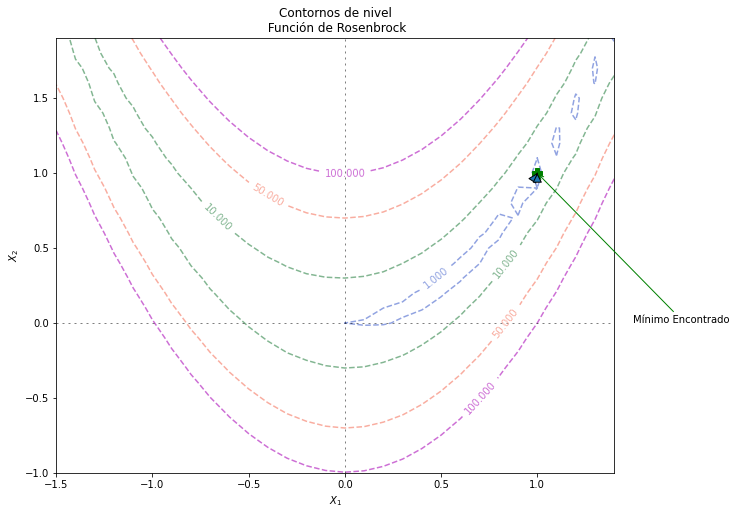

In [13]:
# Segunda condición inicial
x0=np.array([-12.0,10.0]).reshape(-1,1)
proof_newton_fix_step_Rosenbrock(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol,f_Rosenbrock_graph)

Al igual que hicimos con la condición inicial, imprimimos la trayectoria completa a pesar de no mostrarla en la gráfica.

In [14]:
# Trayectoria explícita
dic_results_fix_step_cod_2,trajectory_fix_step_cod_2=newton_fix_step(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol)
np.set_printoptions(precision=4,formatter={'float': '{: 0.4f}'.format})
print(' k  |      xk        |      fk     |    ||gk||    ')
k=0
for xk in trajectory_fix_step_cod_2:
    print(f' {k}  {np.squeeze(xk)}    {np.format_float_scientific(f_Rosenbrock(xk),unique=False,precision=4)}    {np.format_float_scientific(np.linalg.norm(grad_Rosenbrock(xk)),unique=False,precision=4)}')
    k+=1

 k  |      xk        |      fk     |    ||gk||    
 0  [-12.0000  10.0000]    1.7958e+06    6.4378e+05
 1  [-11.9995  143.9884]    1.6899e+02    2.6000e+01
 2  [ 0.9994 -167.9727]    2.8551e+06    7.5529e+04
 3  [ 0.9994  0.9988]    3.7413e-07    1.2233e-03
 4  [ 1.0000  1.0000]    1.3997e-11    1.6731e-04
 5  [ 1.0000  1.0000]    0.0000e+00    0.0000e+00


Observando la trayectoria anterior y la gráfica podemos ver que solo se muestran en las gráfica los último 3 puntos (redondendeamos a 4 decimales al momento de imprimir $x_k$) además de ver otra vez que la trayectoria en el método de Newton no necesariamente es monótona decreciente como en el método de descenso máximo, incluso los primeros 3 valores de la función son valores considerablemente alejados del valor óptimo de la función de Rosenbrock que es $f_R(x_\ast)=0$

# Ejercicio 2 (5 puntos)

Programar el método de Newton con tamaño de paso ajustado por el algoritmo de backtracking.

1. Modifique la función del Ejercicio 1 que implementa el algoritmo del
   método de Newton para incluir como parámetros a la función objetivo $f(x)$ y 
   los parámetros $\rho$ y $c_1$ del algoritmo de backtraking.
* Después de obtener la dirección de descenso $p_k$, 
  calcular el tamaño de paso $\alpha_k$ usando como valor inicial  $\bar{\alpha}_0 = 1$
  en el algoritmo de backtracking.
* Hacer 
  $$x_{k+1} = x_k + \alpha_k p_k. $$
2. Repita la prueba del algoritmo, como se indicó en el Ejercicio 1,
   a la función de Rosenbrock, para ver como cambia la
   trayectoria de los puntos $x_0, x_1, ..., x_k$ en comparación con el resultado anterior, partiendo de $x_0= (-1.2, 1)$ y de $x_0= (-12, 10)$.

## Solución 

Implementamos el método de Newton modificando el tamaño de paso con el algoritmo de backtracking con $\alpha_{0}=1$, $c=0.0001$ y $\rho=0.4$ en cada iteración. Al igual que en el Ejercicio 1 consideramos un número de máximo de iteraciones $N=1000$ y una tolerancia $\tau=\sqrt{\epsilon_m}$.

### Condición inicial $x_0=(-1.2,1)$

En la siguiente celda ejecutamos el método de Newton con backtracking parar optimizar la función de Rosenbrock con la condición inicial $x_0=(-1.2,1)$

El método de Newton con paso fijo CONVERGE
El punto final es: 
xk =  [ 1.0000  1.0000]
fk =  2.4528510178244796e-21
||gk|| =  2.1606802683671457e-09
k =  21


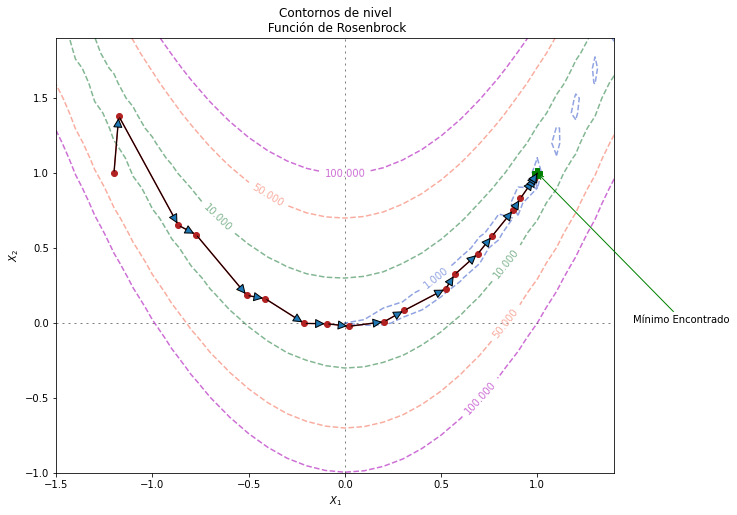

In [15]:
a0,c,rho=1.0,1e-4,0.4
importlib.reload(lib_t6)
from lib_t6 import *

# Primer condición inicial
x0=np.array([-1.2,1.0]).reshape(-1,1)
proof_newton_backtracking_Rosenbrock(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol,a0,rho,c,
f_Rosenbrock_graph)

La convergencia se alcanzó en 21 iteraciones y es más lenta que con paso fijo pues acortamos el tamaño de paso. Al utilizar backtracking como vimos en clase, la sucesión $\{f(x_{i})\}_{i=1}^{k}$ es decreciente, por lo que en la gráfica anterior vemos la trayectoria completa pues el valor de la función objetivo va decreciendo y $x_0\in [-1.5,1.5]\times [-1,2]$, a diferencia de lo obsevado en el Ejercicio 1.

### Condición inicial $x_0=(-12,10)$

Ahora realizamos la prueba con la condición inicial más alejada del óptimo $\mathbf{x}_\ast=(1,1)$. El resultado del método fue el siguiente.

El método de Newton con paso fijo CONVERGE
El punto final es: 
xk =  [ 1.0000  1.0000]
fk =  1.449591655998633e-23
||gk|| =  9.049471772251831e-11
k =  60


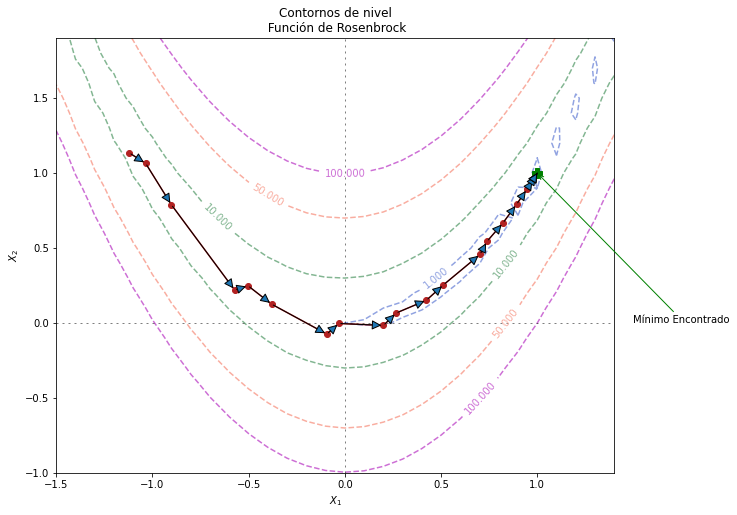

In [16]:
# Segunda condición inicial
x0=np.array([-12.0,10.0]).reshape(-1,1)
proof_newton_backtracking_Rosenbrock(f_Rosenbrock,
grad_Rosenbrock,
hess_Rosenbrock,
x0,N,tol,a0,rho,c,
f_Rosenbrock_graph)

Como solo mostramos las contornos de nivel de la función de Rosenbrock en la región $[-1.5,1.5]\times [-1,2]$ y la condición inicial en este caso es $x_0=(-12,10)$ no podemos mostrar toda la trayectoria, solo la comprendida en dicha región. 

La convergencia se alcanzó en 60 iteraciones, era de esperar que se iban a necesitar más iteraciones en este caso pues aquí la condición inicial $(-12,10)$ está más alejada del óptimo que el punto $(-1.2,1)$ y acortamos el tamaño de paso en cada iteración. 

Concluimos que la segunda condición inicial es un poco mejor que la primera considerando el paso fijo $\alpha=1$, pero al acortar el tamaño de paso, para obtener una sucesión monótona y evitar una mala aproximación cuadrática, claramente la primer condición inicial tiene mejor desempeño que la segunda por estar más cerca del óptimo $\mathbf{x}_\ast=(1,1)$.